In [1]:
from src.lib.utils.FileHandling.FileHandlingInterface import *
from src.lib.SVCDSeg.SVCDSeg import *
import matplotlib.pyplot as plt
import logging
import time
import warnings

In [2]:
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.DEBUG)
warnings.simplefilter("always", RuntimeWarning)

In [3]:
PASCAL_DEMO_IMAGE_PATH = r"src\data\demoPascal\2008_003147.jpg"
PASCAL_DEMO_IMAGE_PATH1 = r"src\data\demoPascal\2010_005258.jpg"

In [4]:
PASCAL_DEMO_SCRIBBLE_PATH = r"src\data\demoPascal\2008_003147.xml"
PASCAL_DEMO_SCRIBBLE_PATH1 = r"src\data\demoPascal\2010_005258.xml"

In [5]:
sample_image = TargetImage(
    PASCAL_DEMO_IMAGE_PATH1             
)

In [6]:
sample_scribble = EncodedScribble(
    PASCAL_DEMO_SCRIBBLE_PATH1
)

In [7]:
n_classes = sample_scribble.get_n_classes()

In [27]:
segmenter = SVCDSeg(
    n_classes,
    alpha = 13.0, 
    sigma = 18.0,
    max_iter = 2500
)

In [28]:
fitted_segmentation = segmenter.fit(
    sample_image,
    sample_scribble 
)

 40%|███████████████████████████████▎                                              | 1004/2500 [04:19<06:26,  3.88it/s]


KeyboardInterrupt: 

In [31]:
fitted_segmentation = segmenter.theta

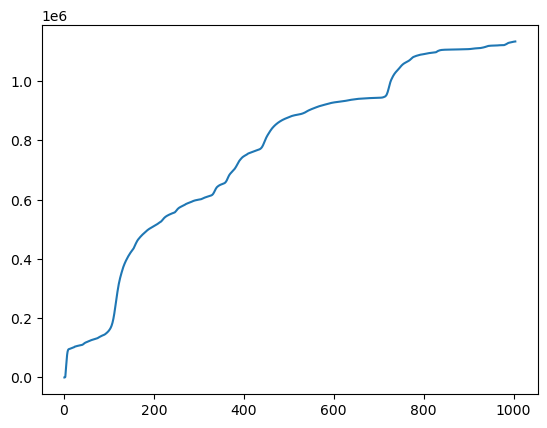

In [29]:
plt.plot(segmenter.dual_energy_history)

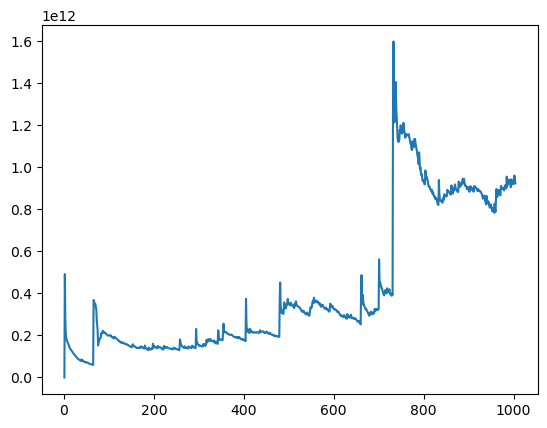

In [30]:
plt.plot(segmenter.primal_energy_history)

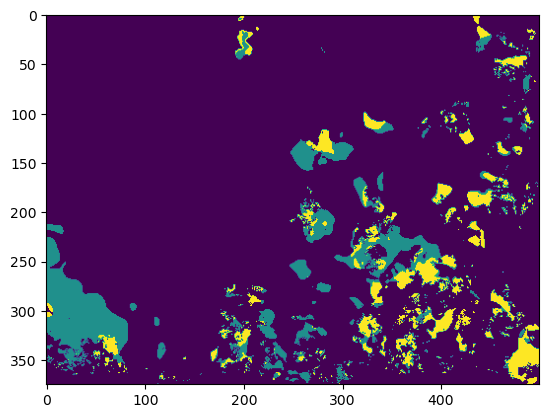

In [32]:
segmentation_max = np.argmax(fitted_segmentation, axis = 0)
plt.imshow(segmentation_max.transpose(1, 0))
plt.show()
plt.close()